# Simple Emotion Recognition Model Based on Text

## Introduction :
- simple emotion recognition model uses machine learning and deeplearning techniques which classifies the emotion into 6 different classes 
- sadness ,anger ,lover,joy,surprise,fear
- Used tfidf vectorizer for training model on texts
- nltk for cleaning texts like removing stop words,lemmatization,stemming
- Emotion detection model can be used to extract the emotion from the comments , sentences , texts. and can be used for predicting the emotions from the texts 



# Installing Dependencies

In [1]:
!pip install tensorflow==2.15.0
!pip install scikit-learn
!pip install pandas
!pip install numpy 
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install nltk

^C


# Load Libraries

In [17]:
# deep learning
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# machine learning
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [6]:
train_data = pd.read_csv("train.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")
# get all words length in comment
train_data['length'] = [len(x) for x in train_data['Comment']]

In [7]:
train_data.head(5)

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [9]:
train_data.shape

(16000, 3)

In [10]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [11]:
train_data.duplicated().sum()

1

# EDA-Exploratory Data Analysis

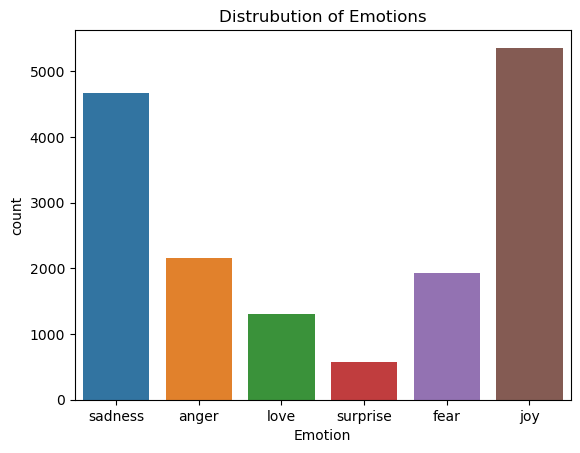

In [13]:
sns.countplot(x=train_data['Emotion'])
plt.title('Distrubution of Emotions')
plt.show()

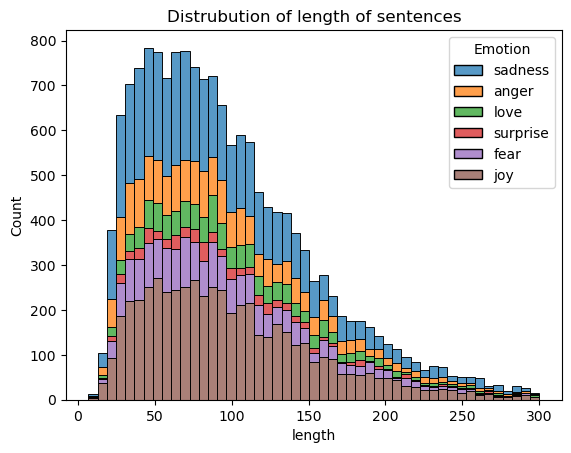

In [19]:
# data distrubution
df1 = train_data.copy()
df1['length'] = [len(x) for x in df1['Comment']]

# Converting 'length' column to a numpy arrray
length_values = df1['length'].values

# Use sns.histplot instead of kde for simplicity
sns.histplot(data=df1,x='length',hue='Emotion',multiple='stack')
plt.title("Distrubution of length of sentences")
plt.show()

### Word clouds

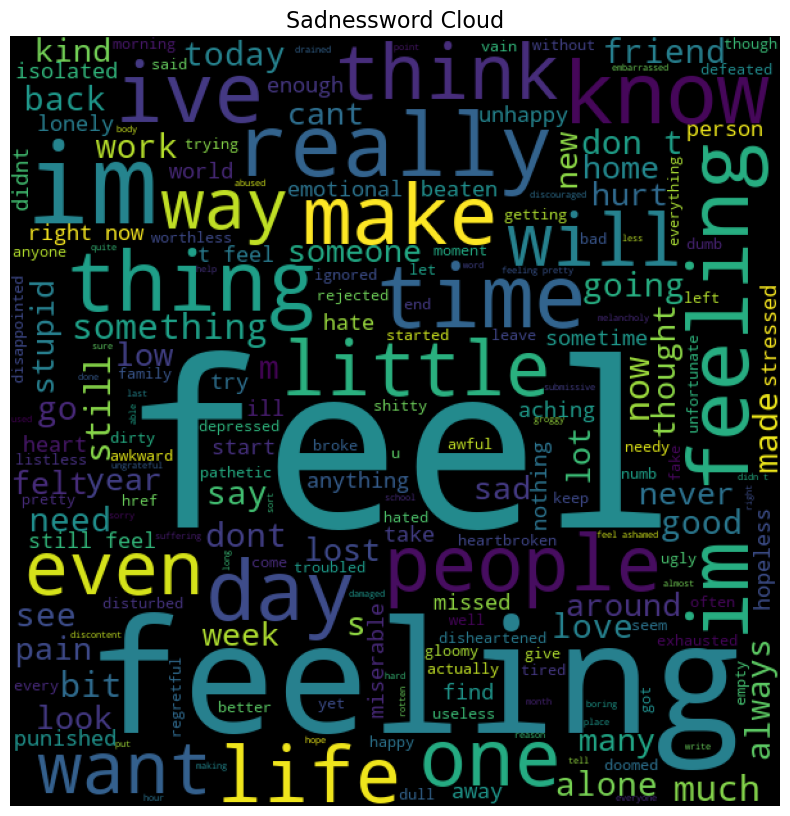

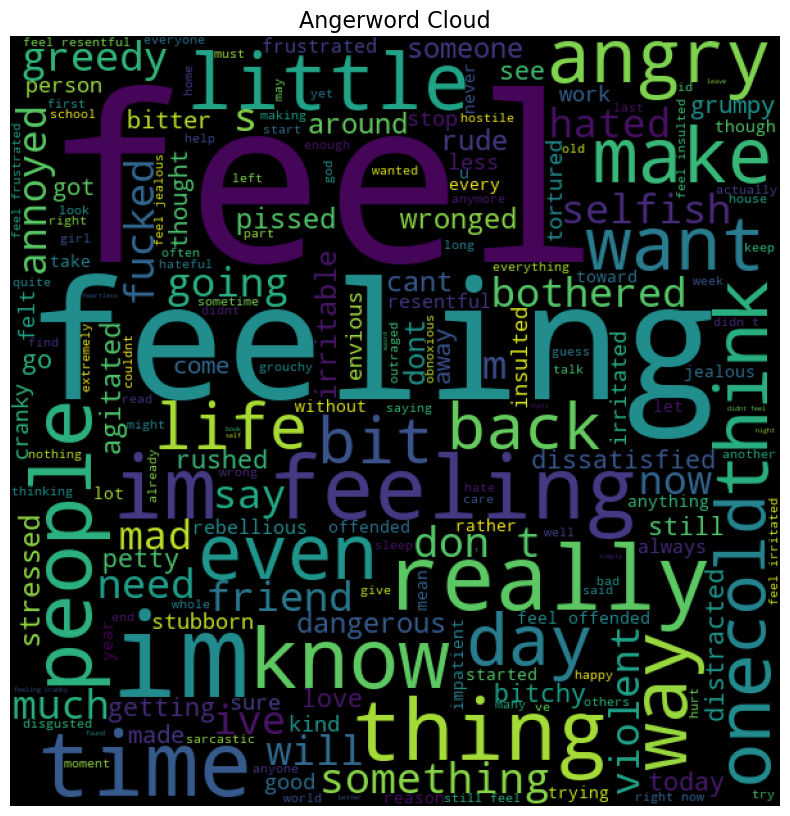

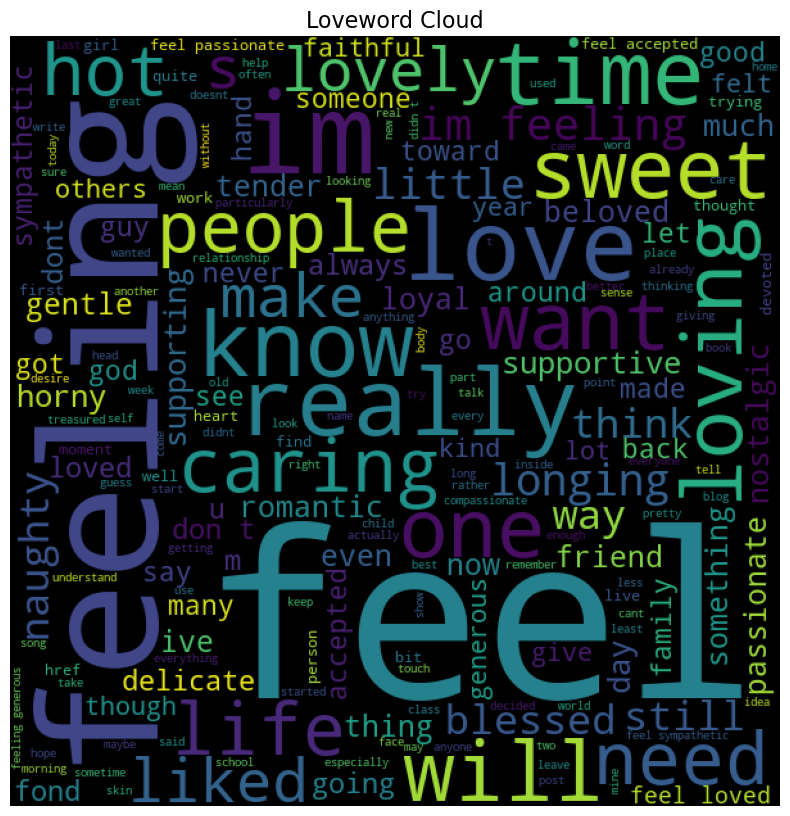

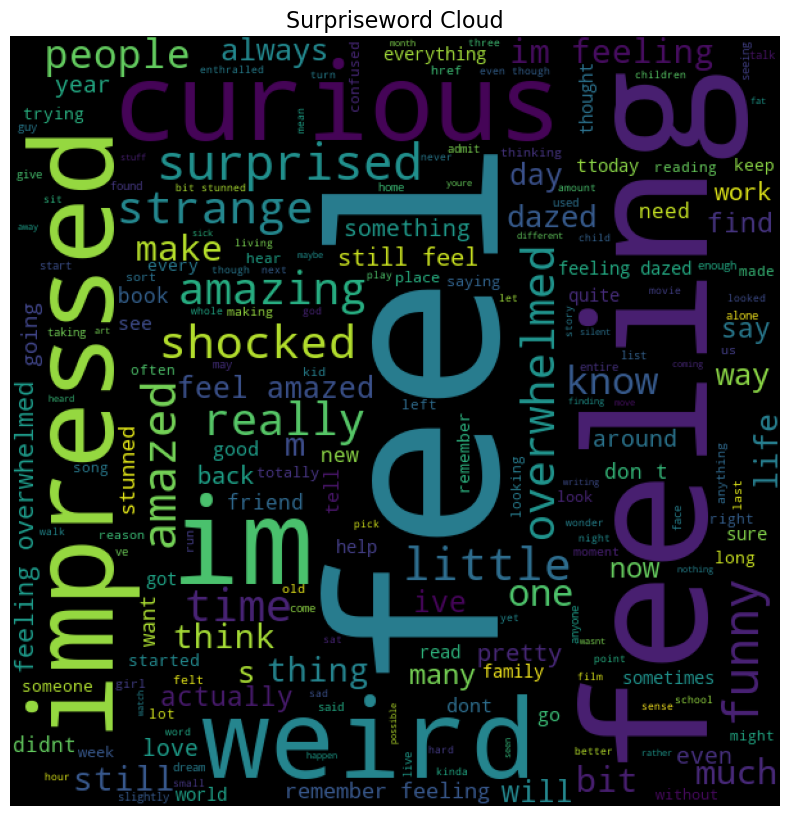

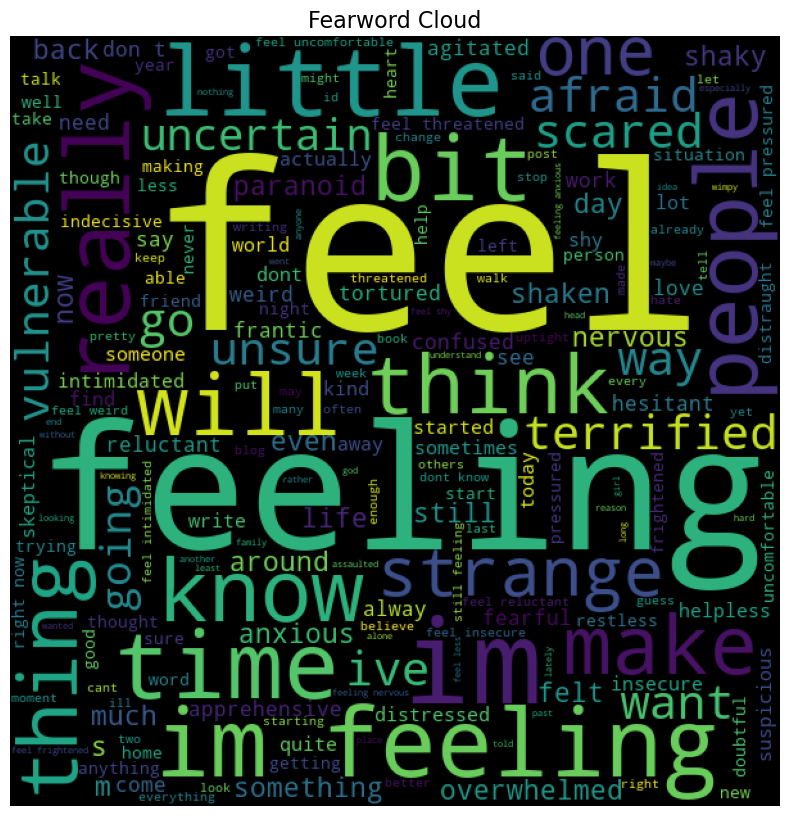

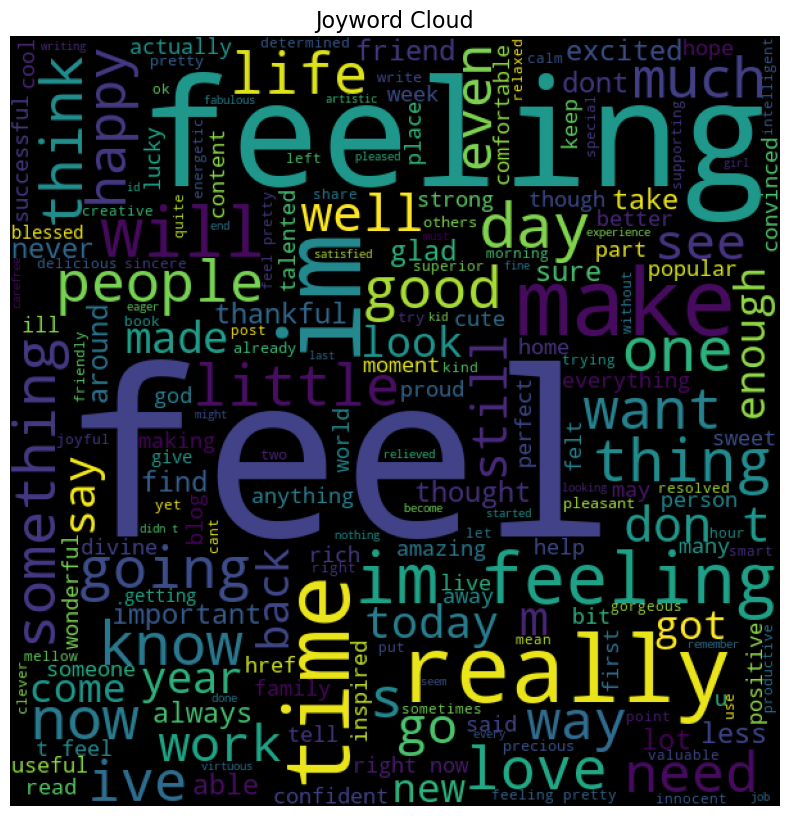

In [22]:
def word_cloud(wordcloud,df):
    plt.figure(figsize=(10,10))
    plt.title(df.capitalize()+'word Cloud',size=16)
    plt.imshow(wordcloud)
    plt.axis("off")

emotions_list = train_data['Emotion'].unique()

for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    word_cloud(wordcloud, emotion)

# Data Preprocessing 

## Encoding Emotions

In [23]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [24]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


# Using Machine Learning

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [31]:
df = train_data.copy()
df

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,4,101
15996,i am now turning and i feel pathetic that i am...,4,102
15997,i feel strong and good overall,2,30
15998,i feel like this was such a rude comment and i...,0,59


In [33]:
# using nltk , stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df['cleaned_comment'] = df['Comment'].apply(clean_text)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mundl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
df['cleaned_comment'] = df['Comment'].apply(clean_text)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_comment'],df['Emotion'],test_size=0.2,random_state=42)

In [45]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [46]:
# Multi-class classification using different algorithms
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

for name, clf in classifiers.items():
    print(f"\n________ {name}________")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))


________ Multinomial Naive Bayes________

Accuracy using TF-IDF: 0.655
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


________ Logistic Regression________

Accuracy using TF-IDF: 0.829375
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       2

In [48]:
# selecting model
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
lg_y_pred = lg.predict(X_test_tfidf)

In [52]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label =  np.max(lg.predict(input_vectorized))

    return predicted_emotion,label

# Example usage 
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print("Label :",label)
    print("_"*70)

i didnt feel humiliated
Prediction : sadness
Label : 4
______________________________________________________________________
i feel strong and good overall
Prediction : joy
Label : 2
______________________________________________________________________
im grabbing a minute to post i feel greedy wrong
Prediction : anger
Label : 0
______________________________________________________________________
He was speechles when he found out he was accepted to this new job
Prediction : joy
Label : 2
______________________________________________________________________
This is outrageous, how can you talk like that?
Prediction : anger
Label : 0
______________________________________________________________________
I feel like im all alone in this world
Prediction : sadness
Label : 4
______________________________________________________________________
He is really sweet and caring
Prediction : love
Label : 3
______________________________________________________________________
You made me v

In [55]:
# saving files
import pickle
pickle.dump(lg,open("logistic_regression.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

# Using DeepLearning

## Text Cleaning , Encoding & Padding

In [56]:
# Text cleaning function
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

# Text cleaning and encoding
x_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)
y_train = to_categorical(train_data["Emotion"])

# Model Building & Training

In [58]:
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
# Training the model
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/10


250/250 [==============================] - 127s 488ms/step - loss: 1.5490 - accuracy: 0.3915
Epoch 2/10
250/250 [==============================] - 114s 457ms/step - loss: 0.9400 - accuracy: 0.6767
Epoch 3/10
250/250 [==============================] - 101s 406ms/step - loss: 0.4020 - accuracy: 0.8754
Epoch 4/10
250/250 [==============================] - 108s 432ms/step - loss: 0.2385 - accuracy: 0.9268
Epoch 5/10
250/250 [==============================] - 111s 445ms/step - loss: 0.1699 - accuracy: 0.9452
Epoch 6/10
250/250 [==============================] - 101s 403ms/step - loss: 0.1398 - accuracy: 0.9546
Epoch 7/10
250/250 [==============================] - 105s 419ms/step - loss: 0.1128 - accuracy: 0.9634
Epoch 8/10
250/250 [==============================] - 105s 422ms/step - loss: 0.0892 - accuracy: 0.9709
Epoch 9/10
250/250 [==============================] - 108s 434ms/step - loss: 0.0874 - accuracy: 0.9709
Epoch 10/10
250/250 [==============================] - 107s 42

# Predictive System 

In [60]:
# Text cleaning function
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# load model and predict 
sentences = [
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i feel strong and good overall
1/1 [==============================] - 0s 72ms/step
joy : 0.9991818070411682


im grabbing a minute to post i feel greedy wrong
1/1 [==============================] - 0s 75ms/step
anger : 0.9987334609031677


He was speechles when he found out he was accepted to this new job
1/1 [==============================] - 0s 35ms/step
sadness : 0.5587410926818848


This is outrageous, how can you talk like that?
1/1 [==============================] - 0s 68ms/step
anger : 0.9039283394813538


I feel like im all alone in this world
1/1 [==============================] - 0s 73ms/step
sadness : 0.9923685193061829


He is really sweet and caring
1/1 [==============================] - 0s 57ms/step
love : 0.9314531087875366


You made me very crazy
1/1 [==============================] - 0s 48ms/step
anger : 0.8967093229293823


i am ever feeling nostalgic about the fireplace i will know that it is still on the property
1/1 [==============================] - 0s 48ms/step


# Saving the Model 

In [61]:
model.save('model1.h5')

# Save the LabelEncoder
with open('lb1.pkl', 'wb') as f:
    pickle.dump(lb, f)

# Save vocabulary size and max length
vocab_info = {'vocab_size': 11000, 'max_len': 300}
with open('vocab_info.pkl', 'wb') as f:
    pickle.dump(vocab_info, f)

In [62]:
# versions used
import tensorflow
import keras
print(keras.__version__)
print(tensorflow.__version__)

2.15.0
2.15.0
